In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [20]:

samples = np.array([10,100,512,1000,10000,100000])
fpga = np.array([1.191877E-05,1.266831E-05,2.785354E-05,4.984062E-05,4.547711E-04,4.504678E-03])
overhead = np.array([3.712000E-06,4.387692E-06,8.222154E-06,1.243200E-05,9.314892E-05,3.954636E-03])
zynq = np.array([2.195000E-06,5.667200E-06,3.080600E-05,7.81080E-05,8.587392E-04,8.707564E-03])
rpi = np.array([1.843600E-06,6.052200E-06,2.751040E-05,3.812500E-05,6.787998E-04,9.339305E-03])

data_single_core = np.loadtxt('test_single_core.csv',delimiter='\t')
fpga = np.zeros(6)
samples = np.unique(data_single_core[:,0])
for i in range(6):
    fpga[i] = np.mean(data_single_core[np.where(data_single_core[:,0] == samples[i])[0],1])
    
data_overhead = np.loadtxt('test_single_overhead.csv',delimiter='\t')
overhead = np.zeros(6)
for i in range(6):
    overhead[i] = np.mean(data_overhead[np.where(data_overhead[:,0] == samples[i])[0],1])
    
data_dual_core = np.loadtxt('test_dual_core.csv',delimiter='\t')
fpga_2 = np.zeros(11)
samples_2 = np.unique(data_dual_core[:,0])
for i in range(11):
    fpga_2[i] = np.mean(data_dual_core[np.where(data_dual_core[:,0] == samples_2[i])[0],1])
    
print(fpga)
print(rpi)
print(overhead)
speed_zynq = zynq/(fpga_2[0::2])
speed_rpi = rpi/(fpga_2[0::2])





[6.04430770e-06 8.72246150e-06 2.51052310e-05 4.44219995e-05
 4.04540000e-04 4.00464570e-03]
[1.843600e-06 6.052200e-06 2.751040e-05 3.812500e-05 6.787998e-04
 9.339305e-03]
[3.6080000e-06 4.1252307e-06 7.2806154e-06 1.1277847e-05 8.3338155e-05
 3.5154005e-03]


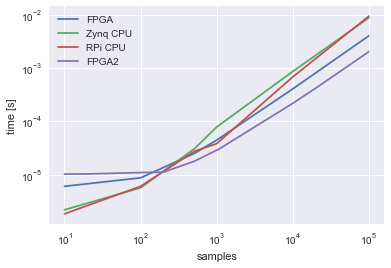

In [7]:
plt.loglog(samples, fpga, label="FPGA")
plt.loglog(samples, zynq, label="Zynq CPU")
plt.loglog(samples, rpi, label="RPi CPU")
plt.loglog(samples_2, fpga_2, label="FPGA2")
plt.xlabel('samples')
plt.ylabel('time [s]')
plt.legend(loc="best", ncol=1)
plt.show()

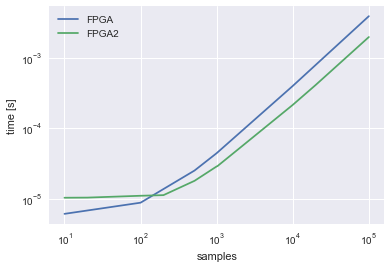

In [5]:
plt.loglog(samples, fpga, label="FPGA")
plt.loglog(samples_2, fpga_2, label="FPGA2")
plt.xlabel('samples')
plt.ylabel('time [s]')
plt.legend(loc="best", ncol=1)
plt.show()

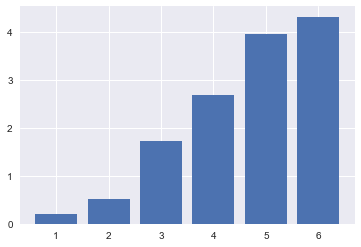

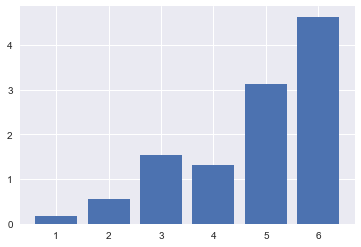

In [21]:
ax = plt.subplot(111)

ax.bar([1,2,3,4,5,6], speed_zynq, 0.8)
plt.show()

ax = plt.subplot(111)
ax.bar([1,2,3,4,5,6], speed_rpi, 0.8)
plt.show()

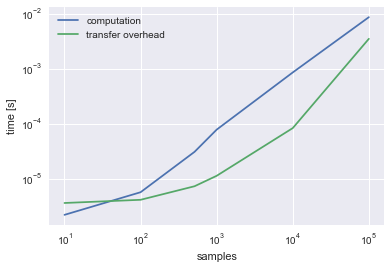

In [9]:
plt.loglog(samples, zynq, label="computation")
plt.loglog(samples, overhead, label="transfer overhead")
plt.xlabel('samples')
plt.ylabel('time [s]')
plt.legend(loc="best", ncol=1)
plt.show()

In [13]:
print(fpga_2)
print(fpga_2[0::2])

[1.02627682e-05 1.03083077e-05 1.09523080e-05 1.11784620e-05
 1.79003080e-05 2.87172310e-05 2.90150750e-05 5.23443080e-05
 2.17061860e-04 4.17495680e-04 2.01875410e-03]
[1.02627682e-05 1.09523080e-05 1.79003080e-05 2.90150750e-05
 2.17061860e-04 2.01875410e-03]
